# Tarea Redes Neuronales
## Grupos de 3 personas
### Entregas atrasadas pierden 1 punto por hora. Si alguien entrega a las 00:00:01 implica que pierde 1 punto en la nota final. Recomendación, entregue una versión inicial cerca de las 22 horas y luego suba las modificaciones.

La NASA mantiene la información de varios cometas y quiere determinar alguna manera de predecir el diametro de un cometa. Específicamente, han analizado en forma manual una muestra de 100,000 asteroides. Los datos consisten en 26 variables, con distinta información como por ejemplo nombre del asteroide, su periodo orbital, su periodo de rotación, etc. Todos los datos existentes, se encuentran en un puro archivo llamado asteroidTrain.csv. Mientras que las descripciones de cada una de las variables se encuentran en el archivo tareaInformacion.txt

Desafortunadamente, la NASA todavía no ha evaluado 37.681 asteroides y no tienen tiempo para realizarlo. Por lo mismo, le piden que aplique una red neuronal feed forward para obtener una predicción de estos asteroides.

1. Lea los datos y borre las variables/asteroides que estime necesario. En caso que crea que la base de datos todavía es demasiado grande para aplicar una red neruonal, usted puede tomar una muestra de la misma. NOTA, justifique cada una de las decisiones tomadas, el puntaje principal se basa en las justificaciones. Una vez generado estos datos, guarde la base de datos final en un nuevo archivo csv (1.5 puntos).
2. Entrene un modelo feed forward. Realice una busqueda de hiperparámetros incluyendo número de capas, número de  neuronas, funciones de activación, epocas, etc. Seleccione un modelo final (justificando a través de una evaluación correcta los hiperarametros seleccionados (2.5 puntos). NOTA, justifique cada una de las decisiones tomadas, el puntaje principal se basa en las justificaciones. 
3. Utilice el modelo seleccionado en el punto anterior y evalue los 37,681 asteroides que la NASA no ha evaluado. En este proceso genere un archivo csv de una sola columna con 37,681 filas donde cada celda tendrá el valor del cometa a predecir (2 puntos). Atención, si ustedes entrega un archivo con un número distinto de filas, de igual manera se evaluará las 37,681 filas.

El punto de evaluación final será una competencia entre todas las tareas basados en los MSE más bajos y altos obtenido por cada grupo. El puntaje final será una regresión lineal entre un modelo muy básico y el mejor puntaje.

Para esta entrega usted deberá entregar 4 archivos
1. Un archivo ipynb que muestre todo el proceso de selección de variables y limpieza de datos aplicados. Además, deberá mostrar la búsqueda de hiperparametros. Este archivo ya deberá haber sido ejecutado y cuando se cargué uno debera ver todo el proceso de ejecución. 
2. Un nuevo archivo CSV que contenga la base de datos luego de la limpieza generada en el primer punto de la tarea.
3. Un archivo ipynb limpio que simplemente cargue la nueva base de datos, entrene el modelo con los hiperparametros seleccionados y genere el archivo csv con las 37,681 estimaciones. Este archivo permitirá ver la replicabilidad de su archivo csv. 
4. Un archivo csv con las 37,681 estimaciones realizadas para el modelo.

In [2]:
import numpy as np
import pandas as pd
import scipy
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [4]:
dataEval = pd.read_csv ("./data/asteroidEval.csv")
dataTrain_bruto = pd.read_csv ("./data/asteroidTrain.csv")

dataTrain = dataTrain_bruto.sample(10000, random_state=2)

# Primero, se eliminaron las variables que estaban vacias.
del(dataTrain['G'])
del(dataTrain['extent'])
del(dataTrain['rot_per'])
del(dataTrain['GM'])
del(dataTrain['BV'])
del(dataTrain['UB'])
del(dataTrain['IR'])
del(dataTrain['spec_B'])
del(dataTrain['spec_T'])
del(dataTrain['neo'])
del(dataTrain['pha'])

# Luego eliminamos:
del(dataTrain['condition_code']) # no es necesario saber qué tan bien se conoce la órbita de un objeto.
del(dataTrain['n_obs_used']) # no es necesario saber que tantas observaciones se usaron.

# El archivo tiene 100.000 filas, de las cuales solo usaremos 10.000 para el entrenamiento. --------------- falta revisar este valor
# dataTrain = dataTrain.sample(10000, random_state=2)

#print(dataTrain.to_string())
dataTrain['diameter'] = dataTrain['diameter'].str.replace('.','').astype(np.float64)
dataTrain.dtypes

C:\Users\satel\AppData\Local\Temp/ipykernel_19664/2037824520.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\satel\AppData\Local\Temp/ipykernel_19664/2037824520.py:2: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\satel\AppData\Local\Temp/ipykernel_19664/2037824520.py:27: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


full_name     object
a            float64
e            float64
i            float64
om           float64
w            float64
q            float64
ad           float64
per_y        float64
data_arc     float64
H            float64
diameter     float64
albedo       float64
moid         float64
dtype: object

<AxesSubplot:>

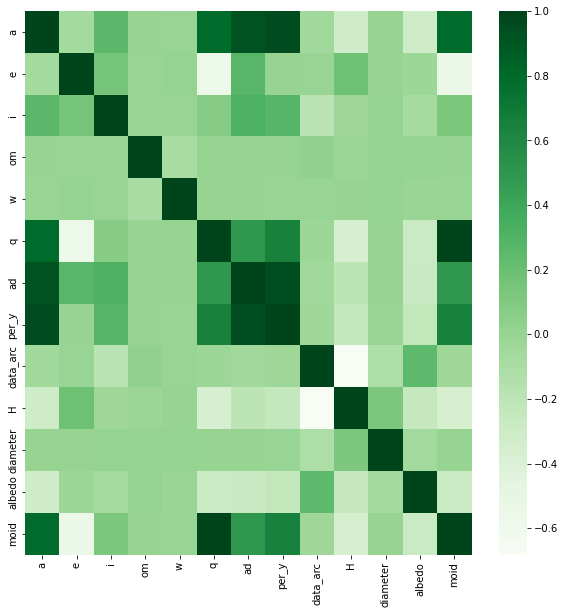

In [8]:
plt.figure(figsize=(10,10))
correlation = dataTrain.corr()
sns.heatmap(correlation,cmap='Greens')

In [11]:
# 2. entrenamos la red neuronal usando feedforward neural network
def train(X, y, hidden_layer_size, learning_rate, epochs):
    # normalizamos los datos
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    y = scaler.fit_transform(y)

    # creamos la red neuronal
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_size,
                       activation='relu',
                       solver='adam',
                       learning_rate_init=learning_rate,
                       max_iter=epochs,
                       verbose=True)
    mlp.fit(X, y)
    return mlp

In [13]:
# function call
data = dataset('asteroidTrain.csv')
X = data.dropna()
y = X['diameter'].astype(float)
mlp = train(X, y, hidden_layer_size=(100,), learning_rate=0.001, epochs=100)

C:\Users\satel\AppData\Local\Temp/ipykernel_19060/1359952481.py:2: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  data = dataset('asteroidTrain.csv')


NameError: name 'StandardScaler' is not defined

In [ ]:
# i got module 'scipy' has no attribute '_lib' error, what can i do?
#